# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn

# import dataset

In [2]:
path = r'C:\Users\ahman\Downloads\googleplaystore.csv'
df = pd.read_csv(path)
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

# data cleaning and prepare

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# replace white spaces between name parts.

df.columns = df.columns.str.replace(' ','_',regex=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [5]:
# replace substring from values which cannot convert to numeric 

for x in df.index :
    df.loc[x,'Reviews'] = df.loc[x,'Reviews'].replace('.0M','000000')

In [6]:
# convert 'Reviews' to suitable numeric variable

df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: int64

In [7]:
# replace substring from values which cannot convert to numeric

for x in df.index :
    df.loc[x,'Size'] = df.loc[x,'Size'].replace('M','000000')

In [8]:
# convert 'Size' to suitable numeric variable

df['Size'] = pd.to_numeric(df['Size'],errors='coerce')
df['Size']

0        19000000.0
1        14000000.0
2               8.7
3        25000000.0
4               2.8
            ...    
10836    53000000.0
10837           3.6
10838           9.5
10839           NaN
10840    19000000.0
Name: Size, Length: 10841, dtype: float64

In [9]:
# replace substring from values which cannot convert to numeric

for x in df.index :
    df.loc[x,'Installs'] = df.loc[x,'Installs'].replace(',','').replace('+','')

In [10]:
# convert 'Installs' to suitable numeric variable

df['Installs'] = pd.to_numeric(df['Installs'],errors='coerce')
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

In [11]:
# replace substring from values which cannot convert to numeric

for x in df.index :
    df.loc[x,'Price'] = df.loc[x,'Price'].replace('$','')

In [12]:
# convert 'Price' to suitable numeric variable

df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [13]:
# convert 'Last_Updated' to suitable datetime variable

df['Last_Updated'] = pd.to_datetime(df['Last_Updated'],errors='coerce')
df['Last_Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 10841, dtype: datetime64[ns]

In [14]:
# check duplicated values

df.duplicated().sum()

483

In [15]:
# drop duplicated values

df.drop_duplicates(inplace=True)

In [16]:
# check null values

df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1842
Installs             1
Type                 1
Price                1
Content_Rating       1
Genres               0
Last_Updated         1
Current_Ver          8
Android_Ver          3
dtype: int64

In [17]:
# calculate the percentage  of null values against all values to choose between refilling it or dropping it

(df.isnull().sum() / ((df.isnull()==False).sum())) * 100

App                0.000000
Category           0.000000
Rating            16.473631
Reviews            0.000000
Size              21.629873
Installs           0.009655
Type               0.009655
Price              0.009655
Content_Rating     0.009655
Genres             0.000000
Last_Updated       0.009655
Current_Ver        0.077295
Android_Ver        0.028972
dtype: float64

In [18]:
# drop null values

df.dropna(inplace=True)

In [19]:
# check null values again

df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [20]:
# check data validity by checking unique values errors

df.select_dtypes(include='object').nunique()

App               6768
Category            33
Type                 2
Content_Rating       6
Genres             112
Current_Ver       2482
Android_Ver         31
dtype: int64

In [21]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [22]:
df['Category'] = df['Category'].str.lower()
df['Category'].unique()

array(['art_and_design', 'auto_and_vehicles', 'beauty',
       'books_and_reference', 'business', 'comics', 'communication',
       'dating', 'education', 'entertainment', 'events', 'finance',
       'food_and_drink', 'health_and_fitness', 'house_and_home',
       'libraries_and_demo', 'lifestyle', 'game', 'family', 'medical',
       'social', 'shopping', 'photography', 'sports', 'travel_and_local',
       'tools', 'personalization', 'productivity', 'parenting', 'weather',
       'video_players', 'news_and_magazines', 'maps_and_navigation'],
      dtype=object)

In [23]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [24]:
df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [25]:
# change 'Content_Rating' to kinds that are in Google site documentation

for x in df.index :
    if df.loc[x,'Content_Rating']=='Mature 17+' :
        df.loc[x,'Content_Rating'] = 'Mature'
    elif df.loc[x,'Content_Rating']=='Adults only 18+' :
        df.loc[x,'Content_Rating'] = 'Adults only'

In [26]:
df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature', 'Adults only',
       'Unrated'], dtype=object)

In [27]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [28]:
# replace ';' from values by space ' '

for x in df.index :
    df.loc[x,'Genres'] = df.loc[x,'Genres'].replace(';',' ')

In [29]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design Pretend Play',
       'Art & Design Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics Creativity',
       'Communication', 'Dating', 'Education', 'Education Creativity',
       'Education Education', 'Education Action & Adventure',
       'Education Pretend Play', 'Education Brain Games', 'Entertainment',
       'Entertainment Brain Games', 'Entertainment Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle Pretend Play', 'Adventure Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation Education', 'Action Action & Adventure',
       'Casual Brain Games', 'Simulation Action & Adventure',
       'Education

In [30]:
# check outliers

df.describe().round(2)

Rating      Reviews          Size      Installs    Price
count  7162.00      7162.00  7.162000e+03  7.162000e+03  7162.00
mean      4.18    288742.60  2.159229e+07  8.091971e+06     1.08
std       0.55   1774433.50  2.504566e+07  4.712069e+07    17.40
min       1.00         1.00  1.000000e+00  1.000000e+00     0.00
25%       4.00       107.25  5.700000e+00  1.000000e+04     0.00
50%       4.30      2362.50  1.500000e+07  1.000000e+05     0.00
75%       4.50     38959.00  3.400000e+07  1.000000e+06     0.00
max       5.00  44893888.00  1.000000e+08  1.000000e+09   400.00

In [31]:
# make subplots of boxplots for numeric columns

fig = make_subplots(rows=1,cols=5)
fig.add_trace(
    go.Box(y=df['Rating'],boxpoints='suspectedoutliers',name='Rating'),
    row=1,
    col=1
)
fig.add_trace(
    go.Box(y=df['Reviews'],boxpoints='suspectedoutliers',name='Reviews'),
    row=1,
    col=2
)
fig.add_trace(
    go.Box(y=df['Size'],boxpoints='suspectedoutliers',name='Size'),
    row=1,
    col=3
)
fig.add_trace(
    go.Box(y=df['Installs'],boxpoints='suspectedoutliers',name='Installs'),
    row=1,
    col=4
)
fig.add_trace(
    go.Box(y=df['Price'],boxpoints='suspectedoutliers',name='Price'),
    row=1,
    col=5
)

In [32]:
# drop outlier values of 'Price'

df = df[df['Price'] < 79]

In [33]:
fig = make_subplots(rows=1,cols=5)
fig.add_trace(
    go.Box(y=df['Rating'],boxpoints='suspectedoutliers',name='Rating'),
    row=1,
    col=1
)
fig.add_trace(
    go.Box(y=df['Reviews'],boxpoints='suspectedoutliers',name='Reviews'),
    row=1,
    col=2
)
fig.add_trace(
    go.Box(y=df['Size'],boxpoints='suspectedoutliers',name='Size'),
    row=1,
    col=3
)
fig.add_trace(
    go.Box(y=df['Installs'],boxpoints='suspectedoutliers',name='Installs'),
    row=1,
    col=4
)
fig.add_trace(
    go.Box(y=df['Price'],boxpoints='suspectedoutliers',name='Price'),
    row=1,
    col=5
)

In [34]:
df = df[df['Price'] < 24]

In [35]:
fig = make_subplots(rows=1,cols=5)
fig.add_trace(
    go.Box(y=df['Rating'],boxpoints='suspectedoutliers',name='Rating'),
    row=1,
    col=1
)
fig.add_trace(
    go.Box(y=df['Reviews'],boxpoints='suspectedoutliers',name='Reviews'),
    row=1,
    col=2
)
fig.add_trace(
    go.Box(y=df['Size'],boxpoints='suspectedoutliers',name='Size'),
    row=1,
    col=3
)
fig.add_trace(
    go.Box(y=df['Installs'],boxpoints='suspectedoutliers',name='Installs'),
    row=1,
    col=4
)
fig.add_trace(
    go.Box(y=df['Price'],boxpoints='suspectedoutliers',name='Price'),
    row=1,
    col=5
)

In [36]:
df = df[df['Installs'] < 500000000]

In [37]:
fig = make_subplots(rows=1,cols=5)
fig.add_trace(
    go.Box(y=df['Rating'],boxpoints='suspectedoutliers',name='Rating'),
    row=1,
    col=1
)
fig.add_trace(
    go.Box(y=df['Reviews'],boxpoints='suspectedoutliers',name='Reviews'),
    row=1,
    col=2
)
fig.add_trace(
    go.Box(y=df['Size'],boxpoints='suspectedoutliers',name='Size'),
    row=1,
    col=3
)
fig.add_trace(
    go.Box(y=df['Installs'],boxpoints='suspectedoutliers',name='Installs'),
    row=1,
    col=4
)
fig.add_trace(
    go.Box(y=df['Price'],boxpoints='suspectedoutliers',name='Price'),
    row=1,
    col=5
)

In [38]:
df = df[df['Installs'] < 50000000]

In [39]:
fig = make_subplots(rows=1,cols=5)
fig.add_trace(
    go.Box(y=df['Rating'],boxpoints='suspectedoutliers',name='Rating'),
    row=1,
    col=1
)
fig.add_trace(
    go.Box(y=df['Reviews'],boxpoints='suspectedoutliers',name='Reviews'),
    row=1,
    col=2
)
fig.add_trace(
    go.Box(y=df['Size'],boxpoints='suspectedoutliers',name='Size'),
    row=1,
    col=3
)
fig.add_trace(
    go.Box(y=df['Installs'],boxpoints='suspectedoutliers',name='Installs'),
    row=1,
    col=4
)
fig.add_trace(
    go.Box(y=df['Price'],boxpoints='suspectedoutliers',name='Price'),
    row=1,
    col=5
)

In [40]:
df = df[df['Installs'] < 5000000]

In [41]:
fig = make_subplots(rows=1,cols=5)
fig.add_trace(
    go.Box(y=df['Rating'],boxpoints='suspectedoutliers',name='Rating'),
    row=1,
    col=1
)
fig.add_trace(
    go.Box(y=df['Reviews'],boxpoints='suspectedoutliers',name='Reviews'),
    row=1,
    col=2
)
fig.add_trace(
    go.Box(y=df['Size'],boxpoints='suspectedoutliers',name='Size'),
    row=1,
    col=3
)
fig.add_trace(
    go.Box(y=df['Installs'],boxpoints='suspectedoutliers',name='Installs'),
    row=1,
    col=4
)
fig.add_trace(
    go.Box(y=df['Price'],boxpoints='suspectedoutliers',name='Price'),
    row=1,
    col=5
)

In [42]:
df = df[df['Reviews'] < 348000]

In [43]:
fig = make_subplots(rows=1,cols=5)
fig.add_trace(
    go.Box(y=df['Rating'],boxpoints='suspectedoutliers',name='Rating'),
    row=1,
    col=1
)
fig.add_trace(
    go.Box(y=df['Reviews'],boxpoints='suspectedoutliers',name='Reviews'),
    row=1,
    col=2
)
fig.add_trace(
    go.Box(y=df['Size'],boxpoints='suspectedoutliers',name='Size'),
    row=1,
    col=3
)
fig.add_trace(
    go.Box(y=df['Installs'],boxpoints='suspectedoutliers',name='Installs'),
    row=1,
    col=4
)
fig.add_trace(
    go.Box(y=df['Price'],boxpoints='suspectedoutliers',name='Price'),
    row=1,
    col=5
)

# analysis

In [44]:
# search for correlation

px.imshow(df.corr(numeric_only=True),aspect=True,text_auto=True,color_continuous_scale='Blues')

In [45]:
px.scatter(data_frame=df,x='Reviews',y='Installs',trendline='ols')

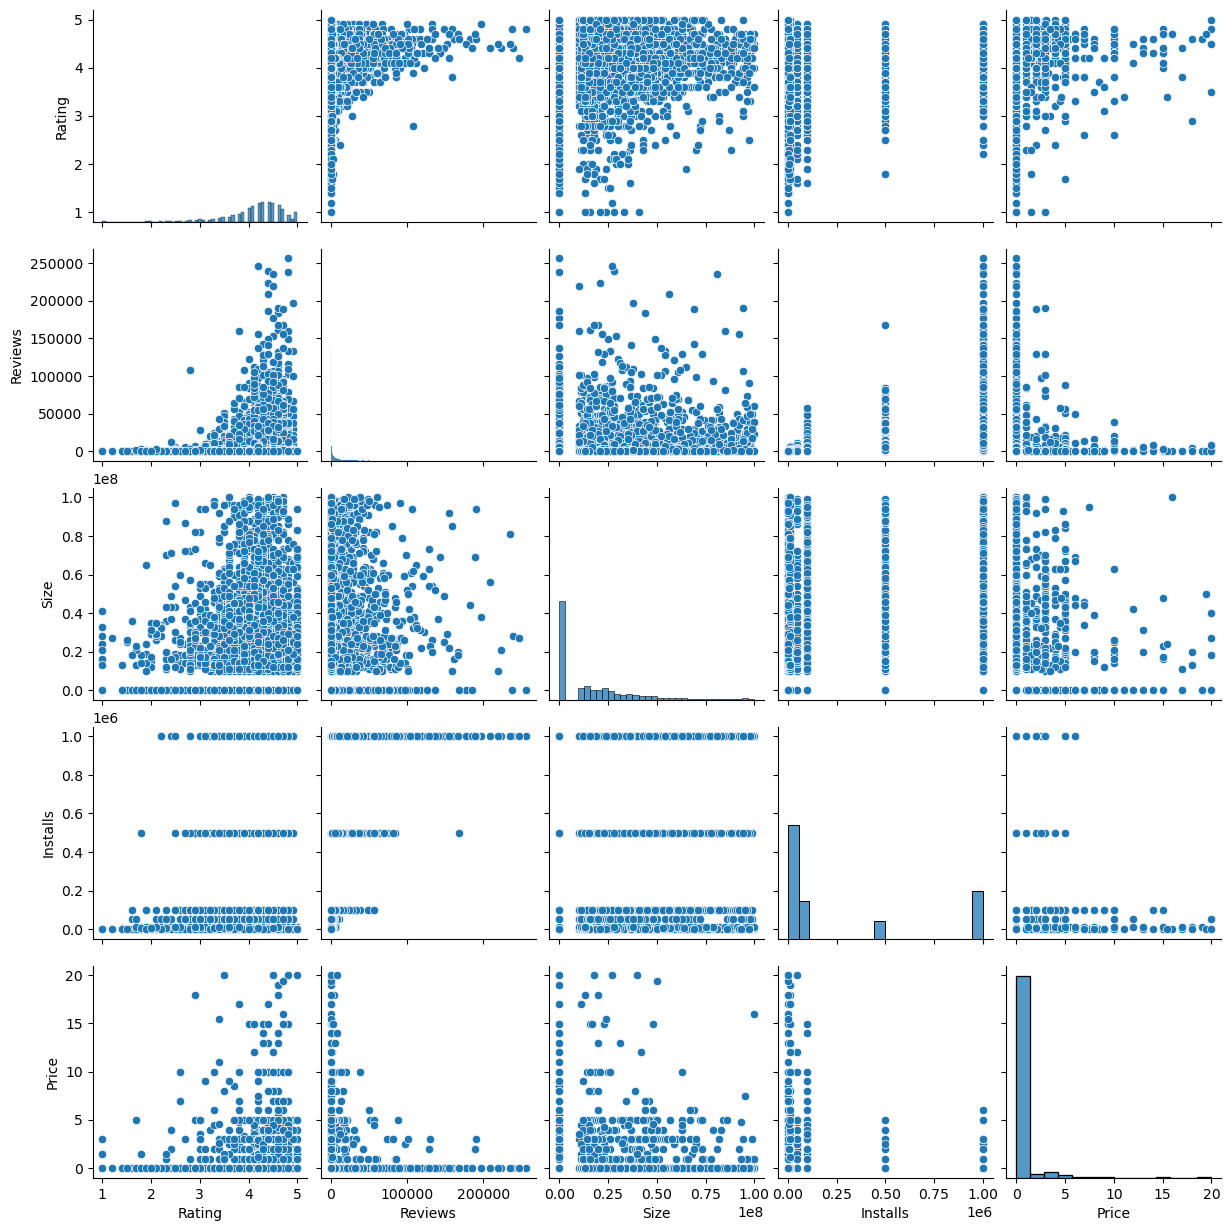

In [46]:
sns.pairplot(data=df)

In [47]:
df[df['Type']=='Free']['Price'].unique()

array([0.])

In [48]:
# try to create a new column 'Profit' to make correlations stronger

df['Profit'] = df['Price'] * df['Installs']
df['Profit']

0        0.0
1        0.0
4        0.0
5        0.0
6        0.0
        ... 
10829    0.0
10830    0.0
10834    0.0
10836    0.0
10837    0.0
Name: Profit, Length: 5523, dtype: float64

In [49]:
px.imshow(df.corr(numeric_only=True),aspect=True,text_auto=True,color_continuous_scale='Blues')

In [50]:
px.scatter(data_frame=df,x='Price',y='Profit',trendline='ols')

In [52]:
# time series analysis
# group profit by Last_Updated

df[['Last_Updated','Profit']].groupby('Last_Updated').agg('sum')

Profit
Last_Updated           
2011-04-16          0.0
2011-04-18          0.0
2012-02-27          0.0
2012-04-09         74.5
2012-07-30          0.0
...                 ...
2018-08-04    2463579.0
2018-08-05      20940.0
2018-08-06          0.0
2018-08-07          0.0
2018-08-08       7990.0

[1136 rows x 1 columns]

In [149]:
px.line(df[['Last_Updated','Profit']].groupby('Last_Updated').agg('sum'),title='profit by date')

In [54]:
# extract year from Last_Updated column

df['year'] = df['Last_Updated'].dt.year
df['year']

0        2018
1        2018
4        2018
5        2017
6        2018
         ... 
10829    2016
10830    2014
10834    2017
10836    2017
10837    2018
Name: year, Length: 5523, dtype: int64

In [62]:
# group profit by year

year_profit = df[['year','Profit']].groupby('year').agg('sum')
year_profit

Profit
year             
2011         0.00
2012        74.50
2013   1522830.50
2014   6624610.30
2015   4463440.00
2016  17325618.30
2017  11645001.18
2018  46353839.10

In [148]:
px.line(year_profit,markers=True,title='profit by year')

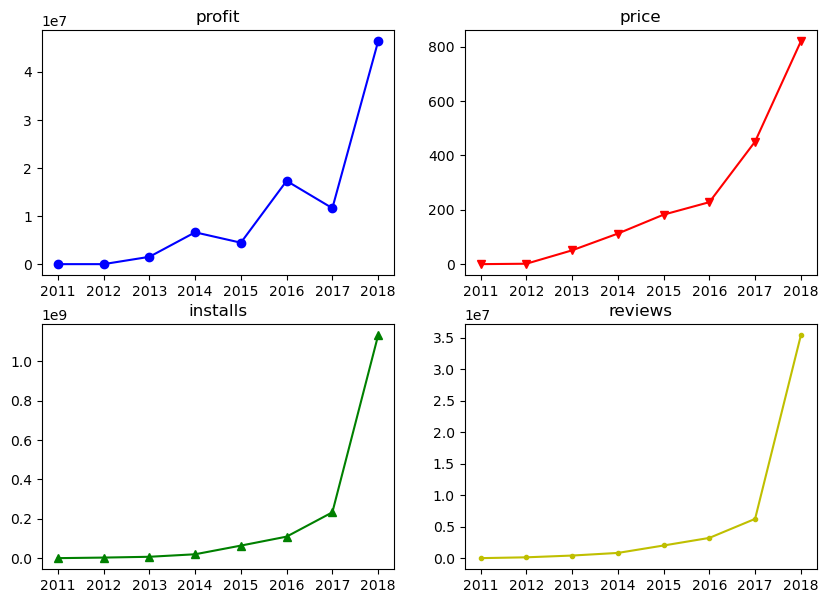

In [144]:
# create subplots of line to analyse the effect of price & installs & reviews on profit regarding the year

fig, ax = plt.subplots(2,2,sharey=False)
ax[0,0].plot(df[['year','Profit']].groupby('year').agg('sum'),color='b',marker='o')
ax[0,1].plot(df[['year','Price']].groupby('year').agg('sum'),color='r',marker='v')
ax[1,0].plot(df[['year','Installs']].groupby('year').agg('sum'),color='g',marker='^')
ax[1,1].plot(df[['year','Reviews']].groupby('year').agg('sum'),color='y',marker='.')
fig.set_figwidth(10)
fig.set_figheight(7)
ax[0,0].set_title('profit')
ax[0,1].set_title('price')
ax[1,0].set_title('installs')
ax[1,1].set_title('reviews')
plt.show()

In [145]:
# pip install ydata-profiling

In [146]:
# make EDA report by ydata-profiling library

from ydata_profiling import ProfileReport

In [147]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]